In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import sklearn
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
import os
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

In [2]:
# Loading in Excel doc into a Dataframe
notebook_path = os.path.abspath("DataAnalysis.ipynb")
temp = os.path.abspath("Data")
df = pd.read_csv(temp + "\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", low_memory = False)

In [3]:
# Edits the Column Names
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/s', '_s')

In [4]:
# Changes BENIGN and DDoS into 0 and 1 respectively so they can be plotted
df.Label = df.Label.replace('BENIGN', 0)
df.Label = df.Label.replace('DDoS', 1)

In [5]:
# Moves Label to the front of the list
df = df[['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin']]

In [6]:
# df.dtypes
# df.columns

In [7]:
#Drops any rows with NA
df.dropna(how = 'any', subset = ['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin'], inplace = True)

In [8]:
# Removing infinity columns from FlowBytes and FlowPackets
df = df[~df.FlowBytes_s.str.startswith('Infinity')]
df = df[~df.FlowPackets_s.str.startswith('Infinity')]

In [9]:
# Converts FlowBytes_s and FlowPackets_s to numeric columns
df[['FlowBytes_s']] = df[['FlowBytes_s']].apply(pd.to_numeric)
df[['FlowPackets_s']] = df[['FlowPackets_s']].apply(pd.to_numeric)

In [10]:
# Prints out the number of each unique item in each column
# for i in df.columns:
#     print(df[i].value_counts())
#     print("\n")

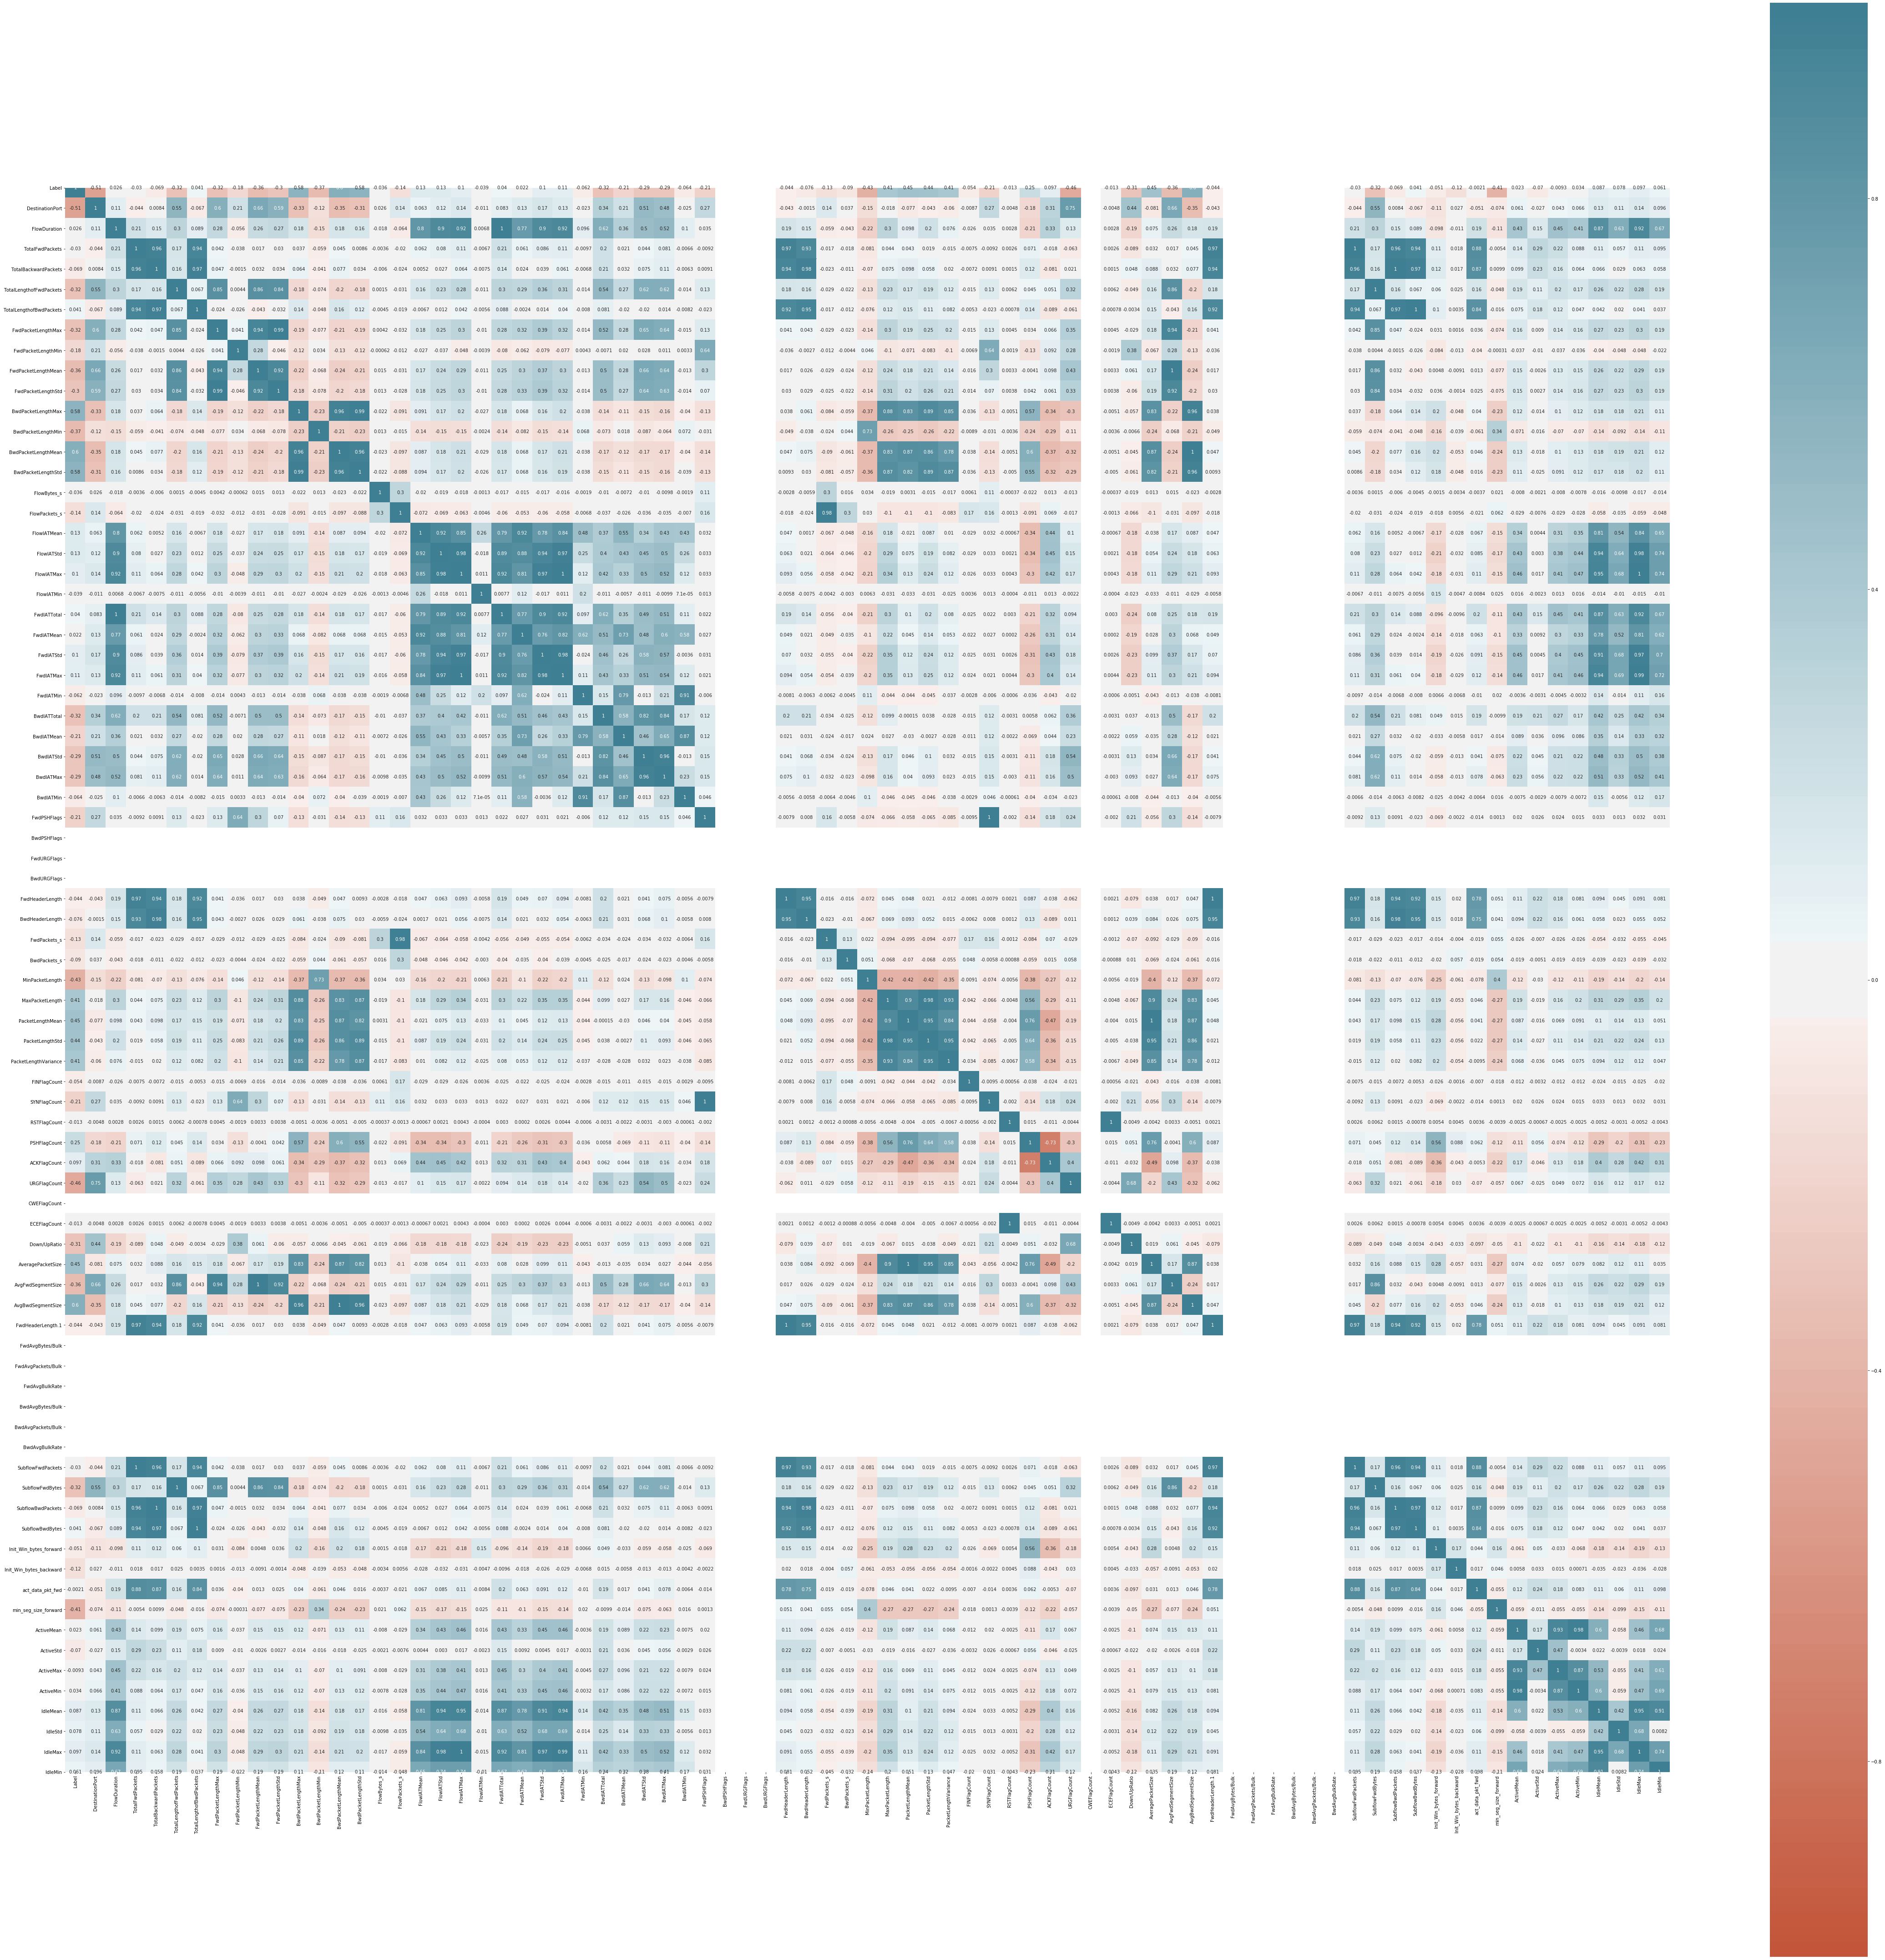

In [11]:
# Making a correlation map
corr = df.corr()
plt.figure(figsize=(79, 79))
heatMap = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

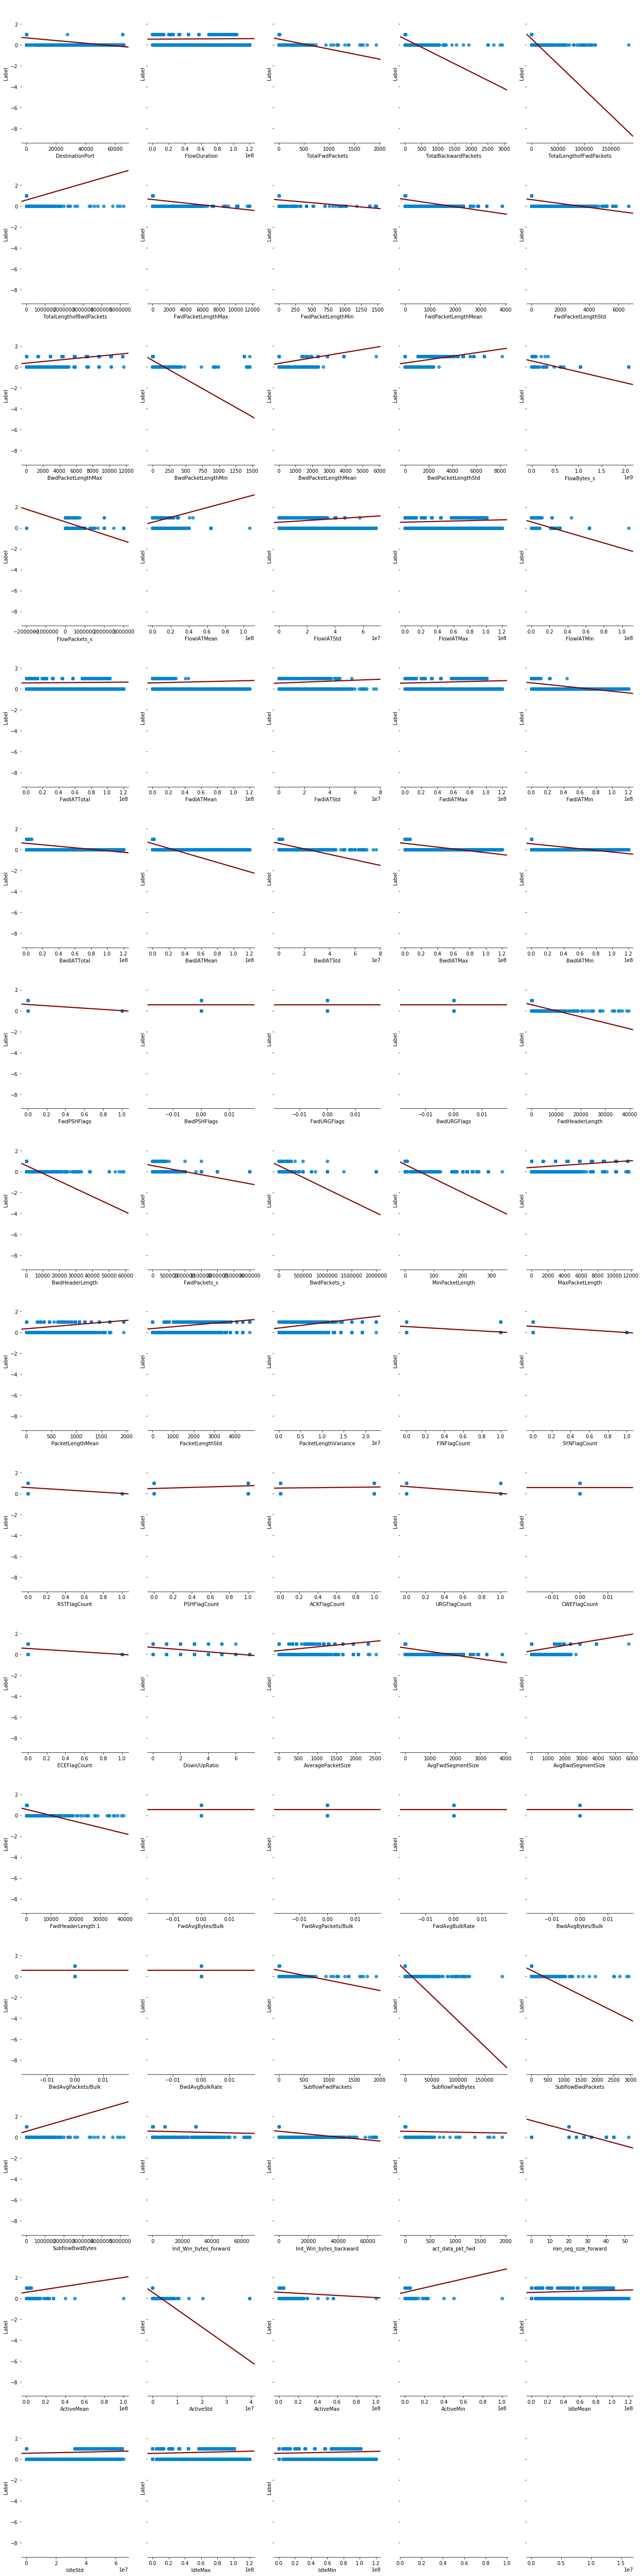

In [12]:
# make a list of only the numerical columns of input
# so don't care about the string and Y outputs

olist = list(df.columns) # original list
yvlist = list(['Label']) # y variable list

# make a new list of only the values I want to compare
xvlist = [x for x in olist if x not in yvlist]

fcol = 5 # limit five graphs per row for easy visualization
frow = int(np.ceil(len(xvlist)/fcol)) # number of rows in your subplot
fhgt = frow*4.5 # set how tall you want the subplot, 4.5 per row seems chill

# Set up the matplotlib figure
f, axes = plt.subplots(frow, fcol, figsize=(18, fhgt), sharey=True) #maybe mess around with auto generate figsize?
sns.despine(left=True)

# make a list of items to iterate over to produce graph
axes_list = [item for sublist in axes for item in sublist]

for k, xvar in enumerate(xvlist):
    
    sns.regplot(
        x=xvar, 
        y='Label', 
        data=df, 
        ax=axes_list[k],
        ci = None, # set the confidence interval to none, so no resampling
        logx=False,
        scatter_kws={'color': 'xkcd:cerulean'}, # using xkcd color codes, https://xkcd.com/color/rgb/
        line_kws={'color': '#840000'} # using hex color codes
    )

plt.tight_layout()

In [19]:
MSEF = 404
dff = None
for i in df:
    j = df
    trainDF, testDF = train_test_split(j, test_size=0.4, random_state=10)
    f = df[['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin', 'Label']]
    lreg = linear_model.LinearRegression()
    train_data = trainDF.drop('Label', axis = 1)
    train_test = trainDF.iloc[:, -1]
    lfit = lreg.fit(train_data, train_test)
    test_data = testDF.loc[:,['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin']]
    test_test = testDF[['Label']].as_matrix()
    prediction_of_test = lfit.predict(test_data)
    MSE = (np.sqrt(sklearn.metrics.mean_squared_error(test_test, prediction_of_test)))
    if MSE < MSEF:
        dff = j
print(dff)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packag

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packag

None


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
